![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Session 5 and 6

### Rima Hinnawi - Data Science Foundations 


# EXERCISE 1: image filtering

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg

## Choose image from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html)

In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color



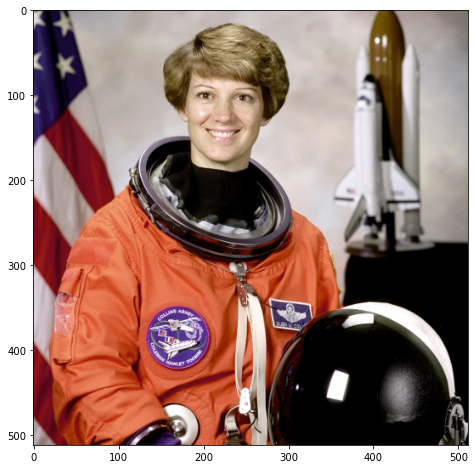

In [2]:
astro = data.astronaut()

plt.figure(figsize=(8, 8))
plt.imshow(astro)
plt.show()

In [3]:
astro.shape

(512, 512, 3)

In [4]:
astro.dtype

dtype('uint8')

## CROP IMAGE


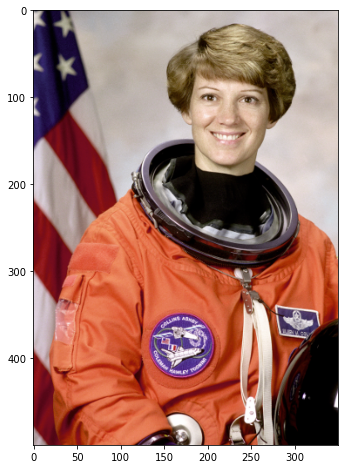

In [5]:
astro = data.astronaut()
crop_astro = astro[:500, :350]

plt.figure(figsize=(8, 8))
plt.imshow(crop_astro)
plt.show()

## Smoothen the image with a kernel filter

In [6]:
from skimage.color import rgb2gray
from scipy import ndimage

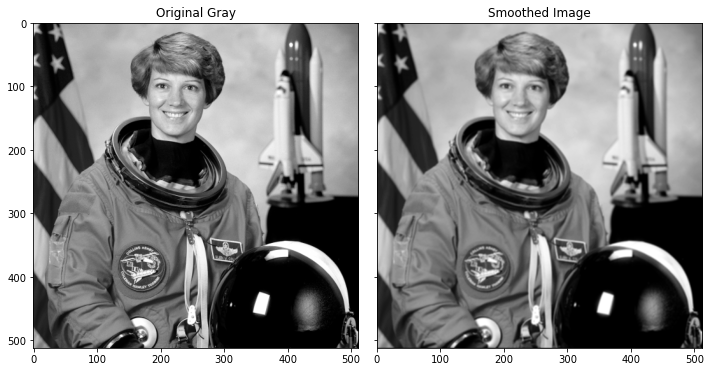

In [7]:

#convert image to grayscale before applying kernel
astro_gray= rgb2gray(astro)

kernel = np.array([ [1/9,1/9,1/9], 
                    [1/9,1/9,1/9], 
                    [1/9,1/9,1/9]]) 

filtered = ndimage.convolve(astro_gray, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(astro_gray, cmap=plt.cm.gray)
ax[0].set_title('Original Gray')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Smoothed Image')

plt.tight_layout()
plt.show()

## Sharpen the image with a kernel filter


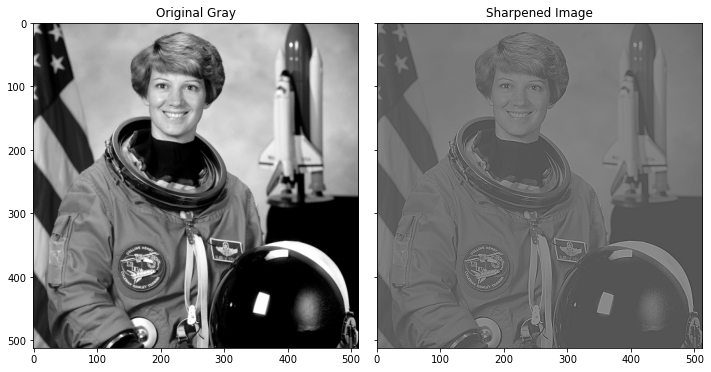

In [8]:

kernel = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

filtered = ndimage.convolve(astro_gray, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(astro_gray, cmap=plt.cm.gray)
ax[0].set_title('Original Gray')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Sharpened Image')

plt.tight_layout()
plt.show()

## Find the edges of the image - Method 1- Horizontal edge

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


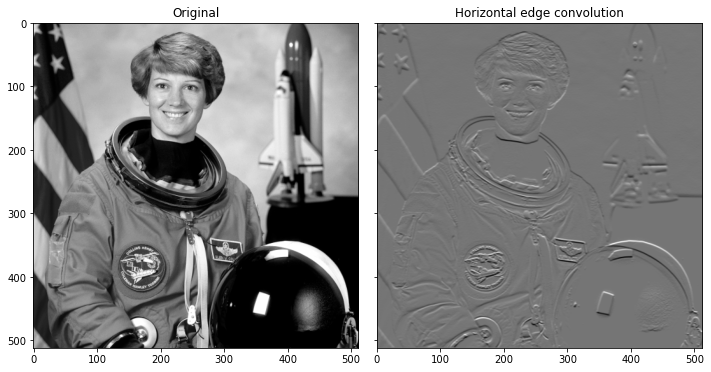

In [9]:


kernel = np.array([ [1, 1, 1], 
                    [0, 0, 0], 
                    [-1, -1, -1]])

print(kernel)

filtered = ndimage.convolve(astro_gray, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(astro_gray, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Horizontal edge convolution')

plt.tight_layout()
plt.show()


## Find the edges of the image - Method 2- Vertical Edge

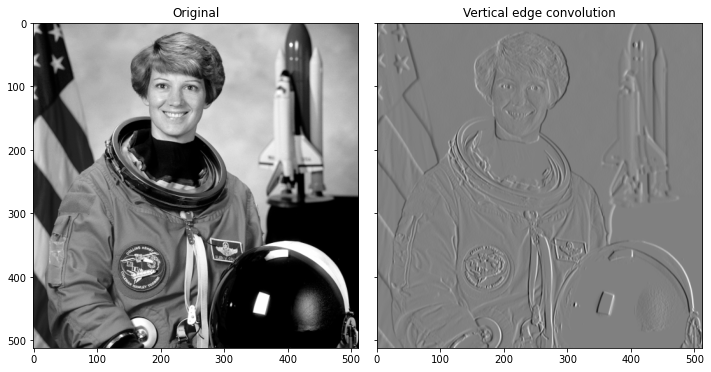

In [10]:
kernel = np.array([ [-1, 0, 1], 
                    [-1, 0, 1], 
                    [-1, 0, 1]])


filtered = ndimage.convolve(astro_gray, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(astro_gray, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Vertical edge convolution')

plt.tight_layout()
plt.show()

## Find the edges of the image - more methods: Canny, Sobel, Roberts

<Figure size 576x576 with 0 Axes>

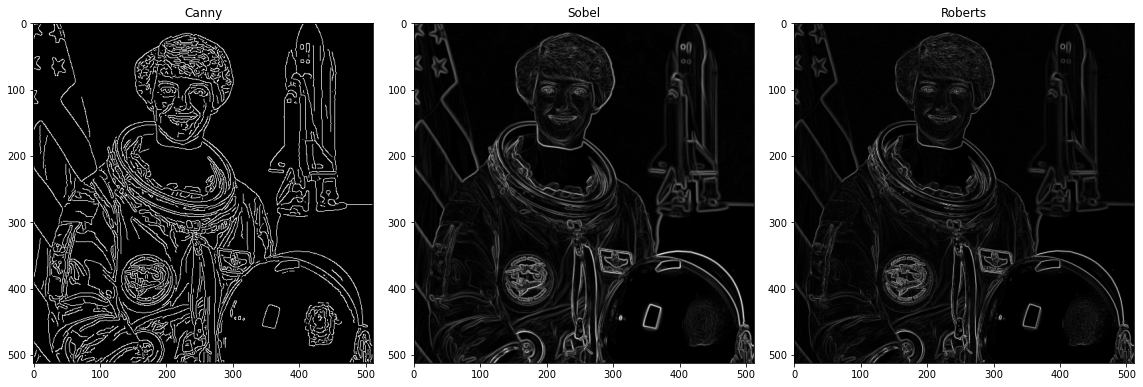

In [11]:

from skimage.feature import canny
from skimage.filters import sobel
from skimage.filters import roberts


canny_astro = canny(astro_gray)

sobel_astro = sobel(astro_gray)

roberts_astro = roberts(astro_gray)

# Plotting edges
plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(ncols=3, sharex=False, sharey=False,
                       figsize=(16, 8))

ax[0].imshow(canny_astro, cmap=plt.cm.gray)
ax[0].set_title('Canny')

ax[1].imshow(sobel_astro, cmap=plt.cm.gray)
ax[1].set_title('Sobel')


ax[2].imshow(roberts_astro, cmap=plt.cm.gray)
ax[2].set_title('Roberts')
plt.tight_layout()
plt.show()

## From the processes above, save the image that you prefer as a .jpg


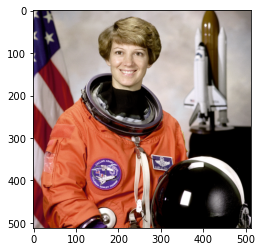

In [12]:
import imageio

#this will be the image to save-- it was cropped above and saved into variable "astro"
plt.imshow(astro)

In [13]:
#save image here by using "imwrite"
imageio.imwrite('fav_astro.jpg', astro)


In [14]:
#save image here by using "imsave" -- another way
imageio.imsave('astronaut.jpg', astro)

# EXERCISE 2: semi-super resolution!

Take one image on your own (or one blurred image from somewhere) and apply the techniques we have seen in class to sharpen an image from a blurred one. You can also blur one image of your own as a start.

In [15]:
# Using one of my images
# making it a numpy array
# then, checking shape and type

In [16]:
reyk_img= imageio.imread('img_reyk.jpg')

In [17]:
reyk_img.shape

(1103, 1078, 3)

In [18]:
type(reyk_img)

imageio.core.util.Array

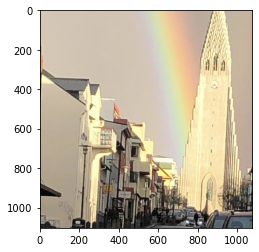

In [19]:
plt.imshow(reyk_img)

In [20]:
#convert image to grayscale  and view
reyk_gray= rgb2gray(reyk_img)


### Blur my image, sharpen my image and display all

In [21]:
# bluring image with gaussian filter and sigma=3 
blurred_img = ndimage.gaussian_filter(reyk_img, sigma=3)

# creating another filter of the blurred image using sigma 1
filter_blurred_img = ndimage.gaussian_filter(blurred_img, 1)

# Sharpening image below
#using an approximation of the Laplacian for increasing the weights of edges
alpha = 30
sharpened = blurred_img + alpha * (blurred_img - filter_blurred_img)


Text(0.5, 1.0, 'Sharpened Image')

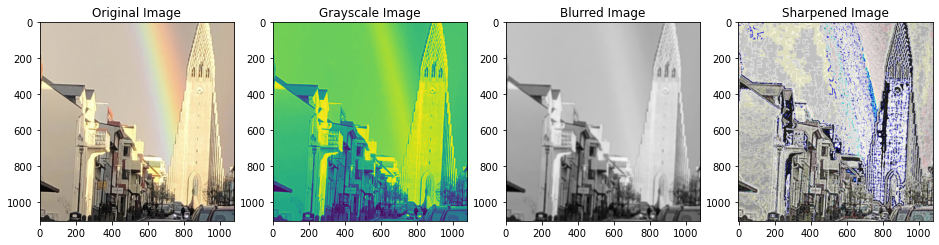

In [22]:

#Display images original, grayscale blurred and sharpened
fig, ax = plt.subplots(ncols=4, sharex=False, sharey=False,
                       figsize=(16, 16))
                

ax[0].imshow(reyk_img)
ax[0].set_title('Original Image')

ax[1].imshow(reyk_gray)
ax[1].set_title('Grayscale Image')

ax[2].imshow(filter_blurred_img, cmap=plt.cm.gray)
ax[2].set_title('Blurred Image')

ax[3].imshow(sharpened, cmap=plt.cm.gray)
ax[3].set_title('Sharpened Image')

## Below are  other techinques we worked on in class

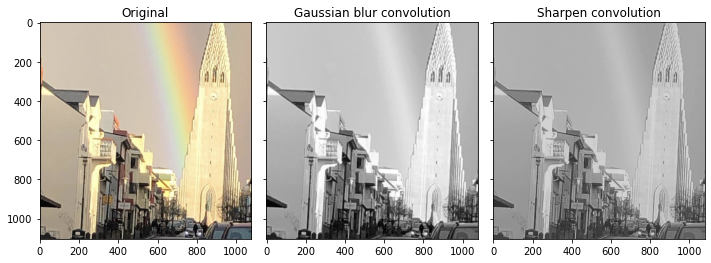

In [23]:

kernel = 1/10000*np.array([ [1, 4, 6, 4, 1], 
                        [4, 16, 24, 16, 4], 
                        [6, 24, 36, 24, 6],
                        [4, 16, 24, 16, 4],
                        [1, 4, 6, 4, 1]]) 

filtered = ndimage.convolve(reyk_gray, kernel, mode='constant', cval=0.0)
kernel2 = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

filtered2 = ndimage.convolve(reyk_gray, kernel2, mode='mirror', cval=0.0)


fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(reyk_img)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Gaussian blur convolution')

ax[2].imshow(filtered2, cmap=plt.cm.gray)
ax[2].set_title('Sharpen convolution')

plt.tight_layout()
plt.show()

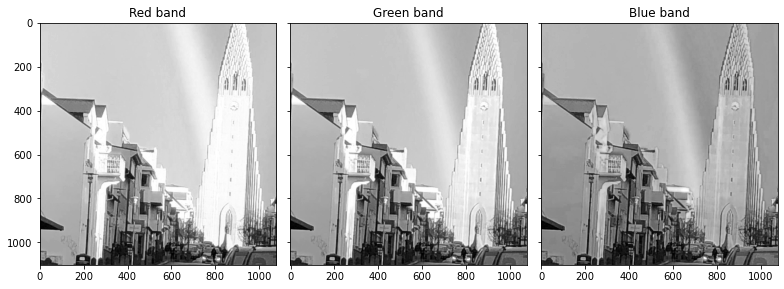

In [24]:

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(11, 4))

ax[0].imshow(reyk_img[:,:,0], cmap=plt.cm.gray)
ax[0].set_title('Red band')

ax[1].imshow(reyk_img[:,:,1], cmap=plt.cm.gray)
ax[1].set_title('Green band')

ax[2].imshow(reyk_img[:,:,2], cmap=plt.cm.gray)
ax[2].set_title('Blue band')

plt.tight_layout()
plt.show()

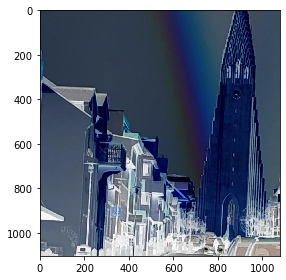

In [25]:
from skimage.io import imshow
from skimage import data
from skimage import util

inverted_img = util.invert(reyk_img)

imshow(inverted_img)

# EXERCISE 3: image segmentation
Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background, preferably dark over white or similar such as coins, chessboard, etc.).

- Load the image with scikit image
- Count the objects in the image using region based segmentation Try to fix the image using opening/closing algorithms

### Load the image with scikit image 
#### View it and study it.. 

In [26]:
img= imageio.imread('objects.jpg')

In [27]:
img.shape

(4032, 3024, 3)

In [28]:
#convert to grayscale
gray_img= rgb2gray(img)

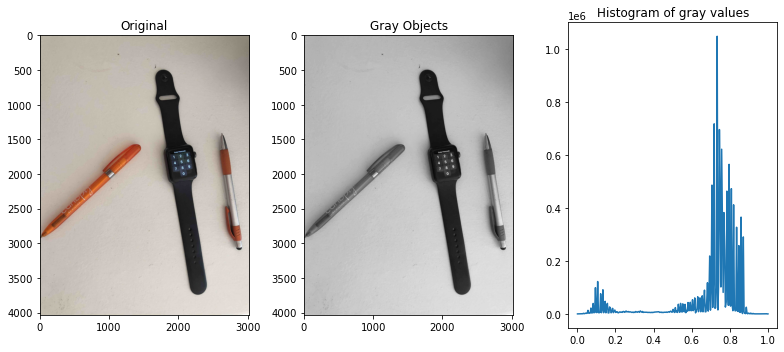

In [29]:
from skimage.exposure import histogram
hist, hist_centers = histogram(gray_img)

# Plot the original, grayscale and histogram
fig, ax = plt.subplots(ncols=3, sharex=False, sharey=False,
                       figsize=(11, 5))

ax[0].imshow(img)
ax[0].set_title('Original')

ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title('Gray Objects')

ax[2].plot(hist_centers, hist)
ax[2].set_title('Histogram of gray values')

plt.tight_layout()
plt.show()

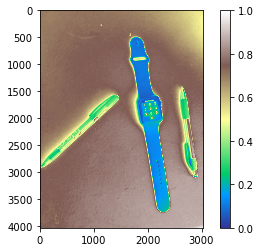

In [30]:
#show gray scale image
plt.imshow(gray_img, cmap=plt.cm.terrain)
plt.colorbar()
plt.show()

### Count the objects in the image using region based segmentation
#### Try to fix the image using opening/closing algorithms
follow processes below to be able to count objects im image

In [31]:
#get markers based on the scale in the image above

# create a zeros array with the same shape 
markers = np.zeros_like(gray_img)

# when above .55 (see image above) we can label as background (1)
markers[gray_img > 0.5] = 1

#  when less than .55 we can label as objects
markers[gray_img< 0.5] = 2



In [32]:
#use markers in watershed segmentation

from skimage.filters import sobel
from skimage.segmentation import watershed

segmentation = watershed(sobel(gray_img), markers)


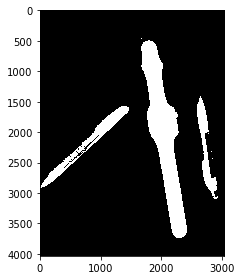

In [39]:
#use morphology to fill holes and show segmented image

from scipy import ndimage as ndi

#fixing the image using opening/closing algorithms


segmentation_treshold = ndi.binary_fill_holes(segmentation - 1)
seg = ndi.binary_opening(segmentation_treshold)
imshow(seg)

In [40]:
#remove small objects 
labeled_obj, x = ndi.label(segmentation_treshold)
print(x)


215


In [41]:
# We get the sizes for each object
# sizes = np.bincount(label_objects.ravel())
sizes = np.bincount(labeled_obj.ravel())
sizes

array([10798044,       64,       16,      230,       55,      263,
              1,   956773,        3,        1,        3,        2,
              1,        2,        2,        2,        1,       15,
              1,        2,        2,   180637,        5,        1,
         253954,        1,       16,        2,        2,        3,
              2,       16,       25,        1,        1,       16,
              4,        2,        5,        1,        2,        4,
              8,        9,       13,        3,       16,        1,
             19,        3,        1,       11,       64,       11,
             18,       30,        2,       12,        4,        1,
             29,        1,       30,        4,       18,        4,
              1,        5,        1,        4,        7,        8,
             16,        2,        2,        1,        1,        1,
              2,        4,        3,        5,        5,       15,
              1,        1,        8,        2,        8,      

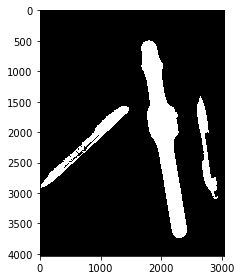

In [42]:
# Then, we mask everything that is above 10000 and display cleaned image
mask_sizes = sizes > 10000
mask_sizes[0] = 0

# We apply the mask to label objects

obj_cleaned = mask_sizes[labeled_obj]

imshow(obj_cleaned)

### FINALLY... We get total count of objects in image: "3" as expected!

In [46]:

labeled_obj, number_obj = ndi.label(obj_cleaned)
print("Total Objects: ", number_obj)


Total Objects:  3
